# Regression Analysis of C-Peptide Dependence on Age and Base Deficit

## INTRO AND SUMMARY GOES HERE

## Methods

### Question: 
Is there a relationship between the serum C-Peptide and other factors (Patient age and Base Deficit) that could predict insulin-resistant Diabetes Mellitus in children?

### Data Source:
KEEL Diabetes Data Set

The data was sourced from KEEL (Knowledge Extraction based on Evolutionary Learning), which is an open source software tool containing datasets that can be used for knowledge data discovery. The chosen dataset is designed for regression analysis, taken from LIACC's repository. The objective of this data is to investigate how factors such as patient age and base deficit (a measure of metabolic acidosis) are associated with concentration of C-peptide, in order to further understand patterns of insulin-resistant Diabetes Mellitus in children.

KEEL Diabetes Dataset (By KEEL). (n.d.). [Dataset]. https://sci2s.ugr.es/keel/dataset.php?cod=45

### Data Structure:

`Age`: Patient Age, domain: [0.9,15.6]

`Deficit`: Base Deficit, measure of acidity, domain: [-29.0,-0.2]

`C-peptide`: Logarithm of C-Peptide concentration (pmol/ml), domain: [3.0,6.6]

### Imports

In [1]:
import pandas as pd
import requests
import zipfile
import os
import io
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

### Download Data into data/ directory
This code was adapted from Microsoft Copilot prompts:
'Use Python to download a data file from a download link into a directory, as a csv'

In [2]:
url = "https://sci2s.ugr.es/keel/dataset/data/regression/diabetes.zip"

file_path = os.path.join("data", "diabetes.zip")

response = requests.get(url)
zip_bytes = io.BytesIO(response.content)

with open(file_path, "wb") as f:
    f.write(response.content)


In [3]:
with zipfile.ZipFile(zip_bytes, "r") as zip_ref:
    dat_files = [f for f in zip_ref.namelist() if f.endswith(".dat")]
    dat_content = zip_ref.read(dat_files[0]).decode("utf-8")

### Data Wrangling and Cleaning
1. original file downloads as .dat, ensure it fits with a .csv format by splitting with the ',' delimiter and stripping lines beginning with '@'
2. re-name columns since names were stripped away
3. ensure data is the correct dtype

In [4]:
lines = dat_content.splitlines()
data_lines = [line for line in lines if not line.startswith("@") and line.strip()]

In [5]:
rows = [line.strip().split(",") for line in data_lines]
diabetes_df = pd.DataFrame(rows)

diabetes_df.columns = ["Age", "Deficit", "C_peptide"]
diabetes_df = diabetes_df.astype(float)

Note: dtypes were set to float manually as they were downloaded as dtype: object

In [6]:
csv_path = os.path.join("data", "diabetes.csv")
diabetes_df.to_csv(csv_path, index=False)

### EDA

In [7]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        43 non-null     float64
 1   Deficit    43 non-null     float64
 2   C_peptide  43 non-null     float64
dtypes: float64(3)
memory usage: 1.1 KB


Figure 1: Dataset summary

No null values, data types were set to float earlier

In [8]:
diabetes_df.describe()

,Age,Deficit,C_peptide
count,43.000000,43.000000,43.000000
mean,9.032558,-8.148837,4.746512
std,4.022539,7.123080,0.720565
min,0.900000,-29.000000,3.000000
25%,5.500000,-12.700000,4.450000
50%,10.400000,-7.800000,4.900000
75%,11.850000,-2.000000,5.100000
max,15.600000,-0.200000,6.600000


Figure 2: Dataset descriptive statistics

The mean patient age is 9 years old, with the maximum age being 15.6 and the minimum being 0.9. The C_peptide concentratio average is about 4.75, mean Base Deficit value is -8.15 mEq/L. The standard deviation of Base Deficit is quite high, at about 7.1 mEq/L, while the stdevs of the other two variables are within a reasonable range for their domains. This high variance could be due to the small size of the dataset.

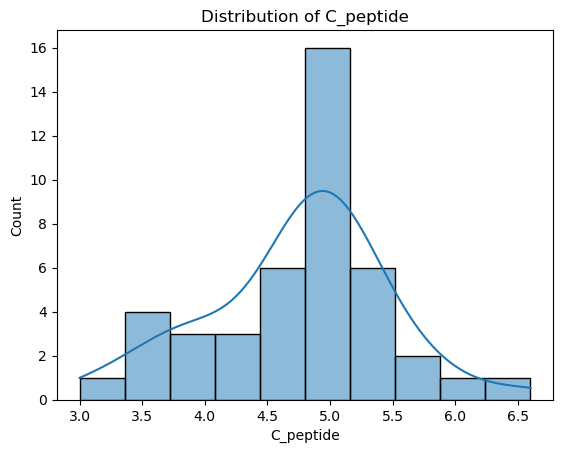

In [9]:
sns.histplot(diabetes_df["C_peptide"], kde=True)
plt.title("Distribution of C_peptide")
plt.show()

Figure 3: Distribution of target variable, C_peptide

In [10]:
alt.Chart(diabetes_df).mark_circle().encode(
    x=alt.X(alt.repeat("column"), type="quantitative"),
    y=alt.Y(alt.repeat("row"), type="quantitative")
).properties(
    width=150,
    height=150
).repeat(
    row=["Age", "Deficit", "C_peptide"],
    column=["Age", "Deficit", "C_peptide"]
)


alt.RepeatChart(...)

Figure 4: Scatterplot matrix of all variables

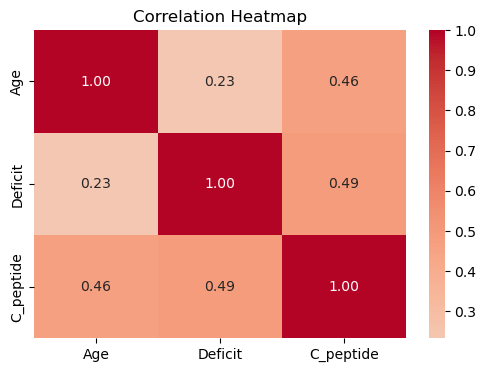

In [11]:
corr = diabetes_df.corr()


plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", center = 0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Figure 5: Correlation heatmap of all variables

#### EDA Summary:
Both features are positively associated with the target variable, `C_peptide`, at approximately equal magnitudes (0.46 and 0.49). The distribution of the target variable is approximately normal, with most values clustered around 5.0. There does seem to be one or two outliers in scatterplots comparing the relationship between `Age` and `Deficit`, but as these are both non-target features this can be ignored for the sake of this analysis. There are no obvious outliers in the relationship between the target and its predictors.

## CONTINUE MODEL HERE

## References

Keel: Software tool. evolutionary algorithms for Data Mining. Welcome to the SCI2S web site. (n.d.). https://sci2s.ugr.es/keel/dataset.php?cod=45#sub1 